# Dimensionality Reduction

> Author: *Valentin Christiaens*  
> Package dependencies: astroML, matplotlib, numpy, pooch, scipy, **scikit-learn**, vip_hci
>
> Install with `pip install -r requirements.txt`
> 
> Last update: *2025/02/19*

**Table of contents**

* [1. Curse of Dimensionality](#1.-Curse(s)-of-Dimensionality)
* [2. Linear dimensionality reduction](#2.-Linear-dimensionality-reduction)
    - [2.1. Principal Component Analysis](#2.1.-Principal-Component-Analysis-(PCA))
        - [2.1.1. Principle](#2.1.1.-Principle)
        - [2.1.2. How can I derive the principal components?](#2.1.2.-How-can-I-derive-the-principal-components?)
        - [2.1.3. PCA workflow](#2.1.3.-PCA-workflow)
        - [2.1.4. Applications](#2.1.4.-Applications)
            - [2.1.4.1 Iris dataset](#2.1.4.1.-Iris-dataset)
            - [2.1.4.2 SDSS Spectra](#2.1.4.2.-SDSS-Spectra)
            - [2.1.4.3 Human Faces](#2.1.4.3.-Human-Faces)
            - [2.1.4.4 Direct imaging of exoplanets](#2.1.4.4.-Direct-imaging-of-exoplanets)
        - [2.1.5. Variants](#2.1.5.-Variants)
    - [2.2. Non-negative Matrix Factorization](#2.2.-Non-negative-Matrix-Factorization)
        - [2.2.1. Principle](#2.1.1.-Principle)
        - [2.2.2. Application to SDSS Spectra](#2.2.2.-Application-to-SDSS-Spectra)
        - [2.2.3. Application to Direct imaging of exoplanets](#2.2.3.-Application-to-direct-imaging-of-exoplanets)
    - [2.3. Independent Component Analysis](#2.3.-Independent-Component-Analysis-(ICA))
        - [2.3.1. Principle](#2.3.1.-Principle)
        - [2.3.2. Application to source separation](#2.3.2.-Application-to-source-separation)
        - [2.3.3. Application to SDSS Spectra](#2.3.3.-Application-to-SDSS-Spectra)
    - [2.4. Dictionary learning](#2.4.-Dictionary-learning)
        - [2.4.1. Principle](#2.4.1.-Principle)
        - [2.4.2. Application to image denoising](#2.4.2.-Application-to-image-denoising)
    - [2.5. Comparison of all linear methods](#2.5.-Comparison-of-all-linear-methods)
* [3. Non-linear dimensionality reduction](#3.-Non-linear-dimensionality-reduction)
    - [3.1. Non-linear PCA](#3.1.-Non-linear-PCA)
    - [3.2. Techniques based on manifold learning](#3.2.-Techniques-based-on-manifold-learning)
        - [3.2.1. Locally Linear Embedding (LLE)](#3.2.1.-Locally-Linear-Embedding)
        - [3.2.2. Isometric mapping (IsoMap)](#3.2.2.-Isometric-mapping)
        - [3.2.3. t-distributed Stochastic Neighbor Embedding (t-SNE)](#3.2.3.-t-distributed-Stochastic-Neighbor-Embedding)


## **Why dimensionality reduction?**

**Dimensionality** refers to having $K$ *features* (dimensions) measured in $N$ observations. For example, having $N$ spectra of $K$ flux values in wavelength, or $N$ images with $K$ pixels.

Data typically have a format (K x N) much larger than the amount of (useful) information they actually hold. Also, large datasets may simply be intractable computationally without some dimensionality/data reduction.

Dimensionality reduction can be particularly useful for:
- noise reduction,
- data compression,
- data visualization,
- cluster analysis, or
- preprocessing (i.e. as an intermediate step to facilitate further analyses -- e.g. remove outliers before regression).

## 1. Curse(s) of Dimensionality

<a class="anchor" id="one"></a>
 
- When dimensionality (i.e. $K$) increases, the *volume* of the dimensional space increases so fast that **available data become very sparse** (i.e. the data don't sample well the dimensional space).

**Example:**  You and your friend both really want to buy a car. Say your friend just wants a red car with good gas mileage. But you... are more picky, and apart from that, you also want the car to have a number of additional `features`: you want leather seats, a sunroof, a very large trunk, heated seats (comfy in winter), and the car to be 4-wheel drive (for fancy outdoor weekends).

Each of those features has a probability between 0 and 1 of being on the car dealer's lot, designated with $p_{\rm red}$, $p_{\rm gas}$, $p_{\rm leather}$, $p_{\rm sunroof}$, $p_{\rm boot}$, $p_{\rm heat}$, and $p_{\rm 4wd}$, respectively.

Assuming a (generous) equal probability of $30\%$ for a car to possess each of these features, the fraction of cars in the dealer's lot that your friend could potentially buy is: $$p_{\rm red} \times p_{\rm gas} = 0.3\times0.3 = 9\%$$
If the dealer has a few tens of cars that should be fine for him to have the freedom to choose between a few of them.

On the other hand, the fraction of cars in the dealer's lot that you could potentially buy given your high standards is:

$$p_{\rm red} \times p_{\rm gas} \times p_{\rm leather} \times p_{\rm sunroof} \times p_{\rm boot} \times p_{\rm heat} \times p_{\rm 4wd} = 0.3^7 = 0.02\%$$
You're *much* less likely to find the car you want at the dealer's lot.

**Example 2:**  
You have 100 data points spanning a space between [0,1]. Now consider that instead these 100 data points held instead 10 features (i.e. spanned instead a 10-D space) with each dimension spanning [0,1]. It'd be very difficult to infer any reliable statistics on these data, as these 100 data points would too sparsely populate the 10-D space. How many points would you need to keep the same density of points in each dimension as in the 1-D case?

In [1]:
n_pts = ##
print(n_pts, 'data points')
print('i.e. {:.2E} data points'.format(n_pts)) # better in scientific notation

**Example 3:**  
Reversely, let's say you want to find "rare" objects in 10 dimensions, where we'll define rare as $<1\%$ of the population. Then you'll need to accept objects from $63\%$ of the distribution in all 10 dimensions!

In [ ]:
p = ##
p

**Example 4:** *(left as exercise)*  
The human genome has over 6 million single-nucleotide polymorphisms, or SNPs (i.e. locations in DNA base pairs that can vary from an individual to another, making them unique). A variation can be: having an A(denine) nucleotide instead of a G(uanine). Say you have genome samples for N=1000 individuals, and you want to study individuals with a particularly low susceptibility to a disease (e.g. Alzheimer). This extremely low genetic susceptibility requires a specific set of 5 SNPs (e.g. having 5Gs instead of 5As at the SNPs). If 80% of the population has an A, while 20% has a G for each of these 5 SNPs: 

**a)** what is the expected number of individuals in your sample that has the very low Alzheimer susceptibility?

**b)** what would be the required size N of your genome sample to expect having at least 10 individuals presenting a low susceptibility to a disease which involves 20 specific SNPs, assuming they each have a 50% occurrence rate in the population?

-----------------------

- In the context of *data mining*, the curse of dimensionality refers to having **too many features present in the data compared to the available data or observations**.

As the number of features in your data grows, the amount of data we need to be able to generalize a rule grows exponentially.

**Example 4
:**  The Sloan Digital Sky Survey (SDSS) comprises a sample of 357 million sources and each source has 448 measured attributes. Assume that most attributes can be straightforwardly related to source classification, but that 10% of the attributes are yet poorly studied. For simplicity assume that these 45 attributes take values in the range [-1,1] following a uniform probability distribution. If as a first step in your analysis you wanted to split the space to only consider sources with positive values for all these 45 attributes (i.e. with 1 chance out of 2 for each attribute), you'd most likely end up with...

In [ ]:
E_pts = ##
print(E_pts, "sources... i.e., most likely 0 source in that volume.")

-----------------------

**What can we do then?**

Well, it depends on the problem you are trying to solve.
First, explore a bit the data to gain understanding of how it can be used to solve your problem. 
Exploration can be done by *testing different dimensionality reduction approaches*.

Fortunately, features (also called attributes) are often **correlated**, in which case the information is more easily extracted from the outputs of dimensionality reduction algorithms. In some cases, evaluating these correlations may just be the problem you are trying to solve.

Different methods (presented in this lecture) will have various levels of success depending on both the data and the problem you try to solve. *Knowing both your data and how the algorithms work is thus key to select the most optimal approach to solve your problem.*

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Side note**:  All algorithms in this lecture fall in the unsupervised machine learning algorithm category - there is no need for labeled data to use them. For labeled data, one can otherwise train supervised ML algorithms.
</div>

## 2. Linear dimensionality reduction


### 2.1. Principal Component Analysis (PCA)

<a class="anchor" id="two"></a>

#### 2.1.1. Principle

**What are the principal components?**

*The principal components associated with multi-dimensional data are the axes that minimize the variance of the data.*

Let's illustrate this with 2D data, randomly generated following a multi-variate Gaussian distribution:

In [ ]:
# Execute this cell
# Ivezic, Figure 7.2
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib.patches import Ellipse

#------------------------------------------------------------
# Set parameters and draw the random sample
np.random.seed(42)
r = 0.9

sigma1 = 0.25
sigma2 = 0.08
rotation = np.pi / 6
s = np.sin(rotation)
c = np.cos(rotation)

X = np.random.normal(0, [sigma1, sigma2], size=(100, 2)).T
R = np.array([[c, -s],[s, c]])
X = np.dot(R, X) #Same data, now rotated by R matrix.

Let's now plot the principal axes, the data, and their projection on the first principal axis:

In [ ]:
from matplotlib import pyplot as plt
#------------------------------------------------------------
# Plot the diagram
fig = plt.figure(figsize=(7, 7), facecolor='w')
ax = plt.axes((0, 0, 1, 1), xticks=[], yticks=[], frameon=False)

# draw axes
ax.annotate(r'$x$', (-r, 0), (r, 0),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', 
                            color='k', lw=1))
ax.annotate(r'$y$', (0, -r), (0, r),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', 
                            color='k', lw=1))

# draw rotated axes
ax.annotate(r'$x^\prime$', (-r * c, -r * s), (r * c, r * s),
            ha='center', va='center',
            arrowprops=dict(color='k', 
                            arrowstyle='<->', 
                            lw=1))
ax.annotate(r'$y^\prime$', (r * s, -r * c), (-r * s, r * c),
            ha='center', va='center',
            arrowprops=dict(color='k', 
                            arrowstyle='<->', 
                            lw=1))

# scatter points
ax.scatter(X[0], X[1], s=25, 
           lw=0, c='k', zorder=2)

# draw lines
vnorm = np.array([s, -c])
for v in (X.T):
    d = np.dot(v, vnorm)
    v1 = v - d * vnorm
    ax.plot([v[0], v1[0]], [v[1], v1[1]], '-k')

# draw ellipses
for sigma in (1, 2, 3):
    ax.add_patch(Ellipse(xy=(0.,0.), width=2 * sigma * sigma1, height=2 * sigma * sigma2,
                         angle=rotation * 180. / np.pi,
                         ec='k', fc='gray', alpha=0.2, zorder=1))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

The points are correlated along a particular direction which doesn't align with the initial choice of axes. **Principal components** are essentially new axes (vectors), which are chosen to align the most with the correlation in the data.

**Intuitive interpretation**: We can view the approach as trying to fit an ellipsoid (of K dimensions) to the data, the axes of which are the principal components. The principal components are sorted from the largest to smallest axes, i.e. they are ordered to capture the most variance in the data.  Note that we haven't made any changes to the data, we have just defined new axes (we haven't actually performed PCA yet, we just saw its expected results). 

Principal components have both **direction** and **magnitude**, and are **orthogonal** with respect to each other. The directions represent the **[principal axes](https://en.wikipedia.org/wiki/Principal_axis_theorem)** across which the data are mostly spread out (have the most variance), and the magnitudes signify the amount of variance that the respective principal components capture of the data, when the data are projected onto the respective axes.

**PCA is a dimensional reduction process because we can generally account for *nearly all* of the variance in the data set with fewer than the original $D$ dimensions.** The whole point of PCA, is to just preserve the first $P$ < $K$ principal components, and use the projection of the data on these principal components. In the simplistic case above, the first principal component holds most of the variance and informs us about the correlation between x and y.

We'll consider a few more examples in 2.1.3 - but before let's see how one can derive the principal components.

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Side note:** One may notice the similarity of the problem of finding the first principal axis with a *linear regression problem* (see Notebook 02) - one wants to minimize the square of the perpendicular distances to the new axis. In fact, singular value decomposition (described below), which is at the core of PCA, is another (elegant) way to solve linear regression problems! See more details in [this post](https://sthalles.github.io/svd-for-regression/).
</div>

#### 2.1.2. How can I derive the principal components?

Mathematically, principal components are the the variance-weighted **eigenvectors** of the **covariance matrix** representing the data. They can be determined through **singular value decomposition**. Let's unpack all this:

**What is the covariance matrix?**

Let's assume a data set probing $K$ different features (aka variables), ${\bf x_1}$ ... ${\bf x_K}$, for $N$ objects (or observations). Each ${\bf x_i}$ is thus a vector of length $N$.
We can construct a matrix $X$ that is $K \times N$ (i.e., each column is an observation of the $K$ features, following numpy convention).
We first need to subtract the mean $\bar{x_i}$ over the observations from each feature. Let's denote $X_m$ the new matrix where $\bar{x_i}$ was subtracted from each ${\bf x_i}$.

The covariance of $X$ is the $K\times K$ matrix

$$C_X=\frac{1}{N-1}X_m X_m^T$$

where $X_m^T$ is the transpose of $X_m$. Note the $N-1$ term, instead of $N$, which is [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 1:** 

Let's assume the following matrix corresponds to 5 measurements of 3 features. Calculate its covariance matrix.
$$ {\bf M} = \begin{pmatrix}
0 & 1 & 2 & 1 & 0\\
-1 & -1 & -1 & 0 & -1\\
-1 & 1 & 1 & 0 & 1
\end{pmatrix} $$

**Note**: `numpy` and `sklearn` use opposite conventions regarding how the measurements should be placed in the matrix (columns vs rows). 
These are transpose of each other. We will use $M$ in this section, and then use $M_s$ with `sklearn`. 
$$ {\bf M_s} = \begin{pmatrix}
0 & -1 & -1 \\
1 & -1 & 1 \\
2 & -1 & 1 \\
1 & 0 & 0 \\
0 & -1 & 1
\end{pmatrix} $$

</div>

In [ ]:
M = np.array([[0, 1, 2, 3, 1],
              [-1, -1, -1, 0, -1],
              [-1, 1, 1, 0, 1]])
Ms = M.T
K, N = M.shape

Manually:

Using `numpy`:

**What is singular value decomposition (SVD)?**

A $n \times m$ real matrix $M$ can *always* be written as the product of 3 matrices:
$$M = U \Sigma V^T$$
with the following properties:
* $U$ and $V$ are unitary matrices (i.e. $U U^T = I$ and $V V^T = I$);
* $\Sigma$ is a diagonal matrix (only the elements on its main diagonal are non-null).

Magic!

* The diagonal elements of $\Sigma$ are called the **singular values** of $M$;
* The columns of $U$ are called the left-**singular vectors** of $M$;
* The columns of $V$ are called the right-**singular vectors** of $M$.

Geometrically, this can be viewed as the factorization of the action of $M$ into a rotation ($V^T$), followed by a scaling ($\Sigma$) followed by another rotation ($U$):
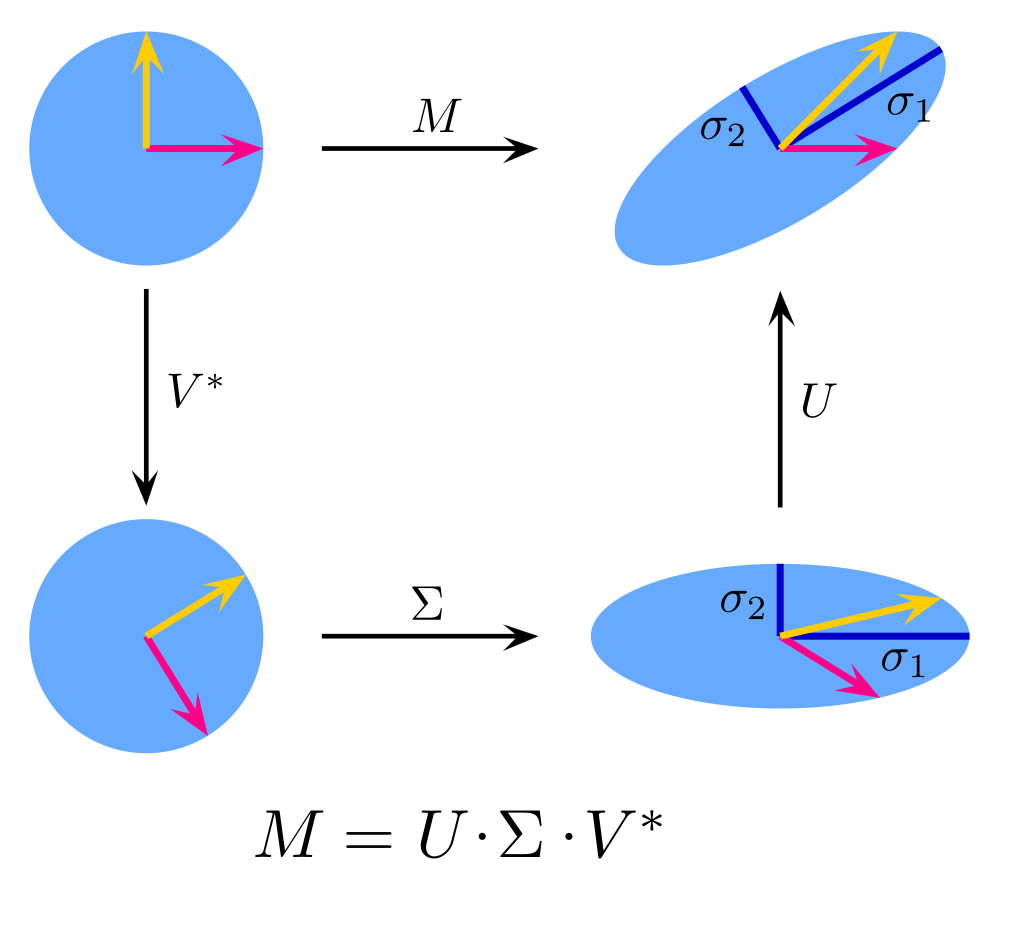

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Side note:** In the figure above, $V^*$ denotes the conjugate transpose of $V$, i.e. the transposed matrix of $V$ in which the complex conjugates are considered for all matrix elements. For real matrices $V^* = V^T$. As we typically deal with real matrices when analyzing real-life data, we simply use the latter notation in this notebook.
</div>

**The SVD of $C_X$ is actually an eigenvalue decomposition**

Singular value decomposition is the generalization to any rectangular matrix of **eigenvalue decomposition**.
But since $C_X$ is square and symmetric, it can always be diagonalized, hence can always undergo an eigenvalue decomposition of the form:
$$C_X = U \Sigma U^{-1}$$
where:
* The diagonal elements of $\Sigma$ are called the **eigenvalues**;
* The columns of $U$ are called the **eigenvectors**. These are **orthonormal** vectors (i.e. can be seen as basis vectors).

**But how are the eigenvectors or eigenvalues found?**

- With a bit of algebra...

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 2:** 

Calculate manually the eigenvalues of the following symmetric matrix (defined above):
$$ {\bf A} = \begin{pmatrix}
1 & 1 & 0\\
1 & 2 & 1\\
0 & 1 & 1
\end{pmatrix} $$

Hint: consider that by property the eigenvalues $\lambda$ must satisfy $\det [{\bf A} - \lambda {\bf I}] = 0$
</div>

In [ ]:
A = np.array([[1, 1, 0],
              [1, 2, 1],
              [0, 1, 1]])

**Either solve it on a sheet of paper, or here below to find the values of $\lambda$:**

Once the eigenvalues are found, the eigenvectors can be found using their definition: ${\bf v_i}$ is an eigenvector of ${\bf A}$ associated to eigenvalue $\lambda_i$ if $$ A {\bf v_i} = \lambda_i {\bf v_i}$$
Note that usually an infinity of vectors satisfy the equation (multiples of each other), such that only the *orthonormal* ones are considered eigenvectors.

- Alternatively, use `numpy.linalg.eig` (beware of rounding errors!):

In [ ]:
import numpy as np
np.linalg.eig(A)

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 3:** 

Now calculate (with numpy) the principal components of $M$ defined in the first exercise.
</div>

It's just a matter of calculating the eigenvectors of C_X calculated in the first exercise!

In [ ]:
# show the results of linalg.eig

In [ ]:
# just consider the eigenvectors

Note: depending on the adopted conventions, the principal components may refer to the eigenvectors themselves, or the eigenvectors scaled by their respective eigenvalue. For simplicity, we'll use principal components and eigenvectors interchangeably in this notebook -- they are anyway identical within a multiplicative factor.

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 4:** 

Reconstruct the original matrix $M$ by projection of **all** the principal components.
</div>

To reconstruct the observed data, ${x}(k)$, using the eigenvector basis, ${e}_i(k)$,  

$$ \begin{equation}
  {x}_i(k) = {\mu}(k) + \sum_j^P c_{ij} {e}_j(k).
\end{equation}
$$

where $c_{ij}$ denote the projection factors in the eigenvector basis.

Let's first calculate these projection factors. This is simply done with the dot product between the eigenvectors and the (mean-subtracted) matrix:

Then let's calculate the reconstructed matrix by applying the projection factors to the principal components. Again this is done with a dot product:

Let's not forget to add back the mean, that we originally subtracted:

Since we have set $P$=$K$ (i.e. we have kept all principal components, which is equal to the number of features), the above equation should give a full perfect reconstruction of the data, since it uses all of the eigenvectors, which form an orthonormal basis.

Let's double-check by comparing the reconstructed and original matrices:

Apart from some rounding errors, we see that we indeed got back the original matrix. Great! This is what we expected - after all we have only changed the basis, but **have not reduced dimensionality yet** since we have kept all principal components.

Now let's see the real usefulness of PCA:

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 5:** 

Reconstruct the original matrix $M$ using a projection of only **2 principal components**.
</div>

First, let's set the number of pcs we want to use:

In [ ]:
P = 2

If we do not use all PCs, we need to only keep the ones corresponding to the largest eigenvalues (in absolute value). Let's sort them:

Now that we have the order, let's apply it to the pcs (and compare with the unordered pcs):

The order of the eigenvectors was indeed changed to match the decreasing order of the eigenvalues.

Now let's *clip* the PCs to only keep the first $P$ ones:

As before, let's calculate the projection factors onto the mean-subtracted original matrix, apply them to the PCs, and add back the mean for each feature:

Finally let's compare with the original matrix:

Not too bad (for a half random input matrix)! By just keeping the 2 PCs that reproduce the most variance in the data, we have been able to reconstruct a matrix relatively close to the original one. This suggests that 2 variables/features are well-correlated and that the total dimensionality can be reduced.

Although the point of PCA may still be somewhat elusive with this academic example, the application to real (big) data will make the appeal of this technique much clearer (Sec. 2.1.4).
But first, let's see how to get some guidance on the optimal number of PCs to use for your data:

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 6:** 

Motivate (retrospectively) the choice of 2 principal components used for matrix $M$, through the cumulative energy content (aka **cumulative explained variance**) captured by the different PCs/eigenvectors.
</div>

The amount of **explained variance** is captured in the **eigenvalues** - this is because these are the eigenvalues of the covariance matrix. First let's sort them in decrasing order, as we did for the eigenvectors.

Now let's make 2 plots, illustrating:
- the explained variance (i.e. the eigenvalue) for each PC (aka **[scree plot](https://en.wikipedia.org/wiki/Scree_plot)**);
- the cumulative explained variance ratio as a function of number of PCs kept.

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)
ax.plot(np.arange(K)+1, ev_sort)
ax.scatter(np.arange(K)+1, ev_sort)
ax.set_xlabel("Principal component")
ax.set_ylabel("Explained variance ")
ax.set_xticks(np.arange(K)+1)

ax = fig.add_subplot(122)
ax.plot(np.arange(K)+1, ev_sort.cumsum()/ev_sort.sum())
ax.scatter(np.arange(K)+1, ev_sort.cumsum()/ev_sort.sum())
ax.set_xlabel("Principal component")
ax.set_ylabel("Cumulative explained variance ratio")
ax.set_xticks(np.arange(K)+1)

plt.show()

The right plot should in general be a good indicator of the number of PCs to keep for your analysis. Here it shows that the first 2 PCs already capture almost all of the variance in the data. This we noticed above by seeing the similarity between the reconstructed matrix versus the input matrix.

Alright, now that you've seen what's under the hood. You're ready to take the shortcut to answer the same question:

In [ ]:
from sklearn.decomposition import PCA

pca_res = PCA()
pca_res.fit(Ms)

In [ ]:
pcs_s = pca_res.components_
ev_s = pca_res.explained_variance_
evr_s = pca_res.explained_variance_ratio_

With the `PCA` function `sklearn` - all the above algebra was done with a single line. Let's check we get the same:

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)
ax.plot(np.arange(K)+1, ev_s)
ax.scatter(np.arange(K)+1, ev_s)
ax.set_xlabel("Principal component")
ax.set_ylabel("Explained variance ")
ax.set_xticks(np.arange(K)+1)

ax = fig.add_subplot(122)
ax.plot(np.arange(K)+1, evr_s.cumsum())
ax.scatter(np.arange(K)+1, evr_s.cumsum())
ax.set_xlabel("Principal component")
ax.set_ylabel("Cumulative explained variance ratio")
ax.set_xticks(np.arange(K)+1)

plt.show()

#### 2.1.3. PCA workflow

In summary, this is how to proceed to apply PCA to your data:

1. Organize the data as a $N \times K$ matrix (`sklearn`) or $K \times N$ (`numpy`) matrix (for $N$ objects or observations of $K$ features or variables).
2. [Optionally] Subtract the mean of each dimension/feature/column (to **"center"** the data).
3. [Optionally] Divide by the variance in each dimension/feature/column (to **"scale"** the data).
4. Calculate the covariance matrix $C_X$ of the mean-subtracted (optionally scaled) data.
5. Calculate the eigenvectors and eigenvalues of $C_X$.
6. Sort the eigenvectors based on the eigenvalues (largest one first) - these are your **principal components**.
7. Compute the cumulative energy content for each eigenvector, based on the sum of eigenvalues up to that principal component.
8. Select a subset of the eigenvectors as basis vectors (e.g. based on a threshold on cumulative energy content).
9. Project the data on the new basis.

In practice, steps 2-9 are done for you under the hood in most implementations of PCA (e.g. in `sklearn`).

#### 2.1.4. Applications

##### 2.1.4.1. Iris dataset

Let's start with a reference (and historically significant) dataset: the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

This dataset was made famous by statistician Robert Fisher in 1936, to illustrate the problem of flower taxonomy using linear discriminant analysis (closely related to PCA, but as a supervised ML algorithm, i.e. with labeled data).

The dataset is a table of different **features** measured for 150 iris flowers. The first 10 entries of the data look as below. Some illustrative examples of various iris flowers are provided to help visualization (and add some poetry to this notebook).

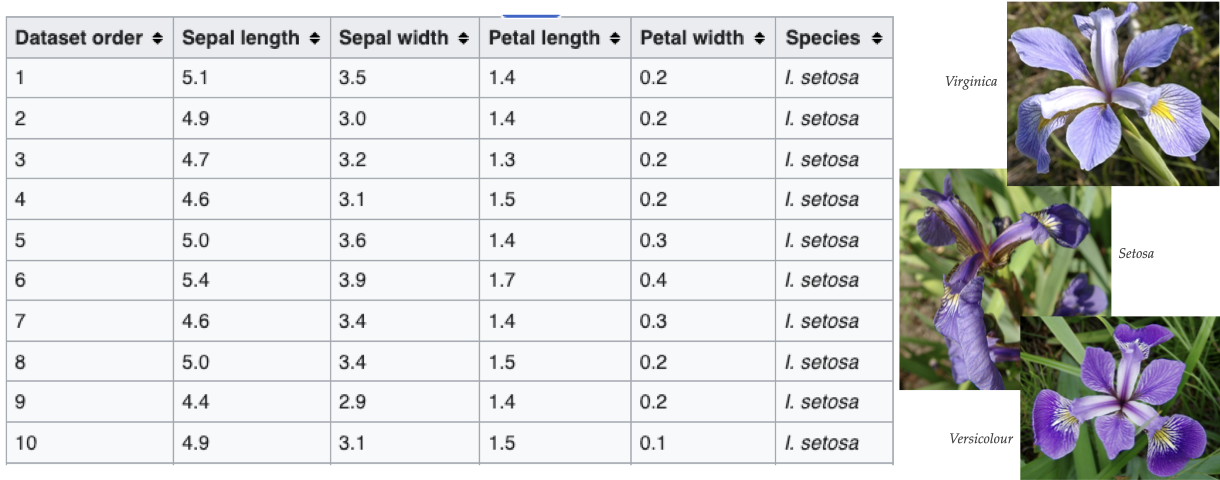

Let's load the dataset:

In [ ]:
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target # this contains the solution (each index is a different species - we won't provide 

In [ ]:
N, K = X.shape

In [ ]:
X[:10]

Let's first check how the data spread in a plot showing their first 2 features:

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

This is with a 3D plot, including the third feature.

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(subplot_kw={'projection': '3d'})
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], zlabel=iris.feature_names[2])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In both of the above plots, without the color labels it'd be pretty hard to guess we have different varieties of iris.

Now let's use **PCA**. And let's first act as if we didn't have labels nor knew the number of different species of iris flowers are present in the data:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA() # no argument, means all pcs are calculated
pca.fit(X)

pcs_s = pca.components_
ev_s = pca.explained_variance_
evr_s = pca.explained_variance_ratio_

In [ ]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)
ax.plot(np.arange(K)+1, ev_s)
ax.scatter(np.arange(K)+1, ev_s)
ax.set_xlabel("Principal component")
ax.set_ylabel("Explained variance ")
ax.set_xticks(np.arange(K)+1)

ax = fig.add_subplot(122)
ax.plot(np.arange(K)+1, evr_s.cumsum())
ax.scatter(np.arange(K)+1, evr_s.cumsum())
ax.set_xlabel("Principal component")
ax.set_ylabel("Cumulative explained variance ratio")
ax.set_xticks(np.arange(K)+1)

plt.show()

It looks like either 2 or 3 would be a good number of PCs to use, as they explain most of the variance (~98% and >99% respectively). Let's pick 3: 

In [ ]:
pca = PCA(n_components=3) # here we now specify we want 3 components
pca.fit(X)

And project the results on the basis formed with the first 3 PCs:

In [ ]:
Xt = pca.transform(X)
Xt

Now let's plot the results of the projection of the data onto the new basis:

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=25, azim=100)
ax.set_position([0, 0, 0.95, 1])

plt.cla()
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        Xt[y == label, 0].mean(),
        Xt[y == label, 1].mean() + 2.5,
        Xt[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y.astype(int), [1, 2, 0])
ax.scatter(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In this basis, the three species of iris are much better separated. Some clustering algorithm may be able to identify the different species.

As a test, feel free to try PCA with 2 components. Is it possible to discriminate as well the different species in that smaller basis?

##### 2.1.4.2. SDSS Spectra

Let's now look at spectra of galaxies taken during the Sloan Digital Sky Survey. In this sample there are 4000 spectra with flux measurements in 1000 wavelength bins.  15 example spectra are shown below and our example will use half of the available spectra, chosen at random.  

![Ivezic, Figure 7.1](http://www.astroml.org/_images/fig_spec_examples_1.png)

Let's first load the data:

In [ ]:
# Example from Andy Connolly
# See Ivezic, Figure 7.4
from astroML.datasets import sdss_corrected_spectra
from astroML.utils import pickle_results

data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)
print('Number of spectra: ' + str(len(spectra)))
print('Number of wavelength bins: ' + str(len(wavelengths)))

Let's consider a random sample of 2000 spectra:

In [ ]:
np.random.seed(500)
nrows = 2000 # We'll just look at 2000 random spectra
ind = np.random.randint(spectra.shape[0], size=nrows)

spec_samp = spectra[ind]

Let's now calculate 5 PCs:

In [ ]:
n_components=5

In [ ]:
from sklearn.decomposition import PCA

spec_mean = spec_samp.mean(0) # Compute the mean spectrum, which is the first component

# use Randomized PCA for speed
# pca = RandomizedPCA(n_components - 1)
pca = PCA(n_components) # if slow, use the option: svd_solver='randomized'
pca.fit(spec_samp)

**Now let's plot the components (eigenvectors).** The left hand panels are just the *first 5 spectra for comparison* with the *first 5 PCA components*, which are shown on the right.  They are ordered by the magnitude of their eigenvalues (i.e. their explained variance ratio).

In [ ]:
# Make plots
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

title1 = 'Sample spectra'
title2 = 'PCA components'

for j in range(n_components):

    # plot the first j spectra
    ax1 = fig.add_subplot(n_components, 2, 2*j+1)
    ax1.yaxis.set_major_formatter(plt.NullFormatter())
    ax1.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax1.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_xlabel('wavelength (Angstroms)')
    ax1.plot(wavelengths, spectra[j], '-k', lw=1)
    ## plot zero line
    xlim = [3000, 7999]
    ax1.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax1.set_xlim(xlim)
    if j == 0:
        ax1.set_title(title1, fontsize='medium')
    ## adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax1.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

    # plot the components
    ax2 = fig.add_subplot(n_components, 2, 2*j+2)
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax2.set_xlabel('wavelength (Angstroms)')
    ax2.plot(wavelengths, pca.components_[j], '-k', lw=1)
    # plot zero line
    ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax2.set_xlim(xlim)
    
    if j == 0:
        ax2.set_title(title2, fontsize='medium')
        
    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
    
    label = 'component %i' % (j+1)    
    ax2.text(0.02, 0.95, label, transform=ax2.transAxes,
            ha='left', va='top', bbox=dict(ec='w', fc='w'),
            fontsize='small')

plt.show()

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Side note:** We have seen so far that it is recommended to subtract the mean for each feature/variable. Note that this is not mandatory. If not performed, your first principal component will be very similar to a normalized mean of your features -- here a normalized mean spectrum. The principal components are ordered to capture the most variance, and so does the mean by definition.
</div>

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

title1 = 'Mean spectrum'
title2 = 'First PC'

mean_spec = spec_samp.mean(0) 

# plot the mean spectrum
ax1 = fig.add_subplot(n_components, 2, 1)
ax1.xaxis.set_major_locator(plt.MultipleLocator(1000))
ax1.set_xlabel('wavelength (Angstroms)')
ax1.plot(wavelengths, mean_spec, '-k', lw=1)
## plot zero line
ax1.plot(xlim, [0, 0], '-', c='gray', lw=1)
ax1.set_xlim(xlim)
ax1.set_title(title1, fontsize='medium')
## adjust y limits
ylim = plt.ylim()
dy = 0.05 * (ylim[1] - ylim[0])    
ax1.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

# plot the components
ax2 = fig.add_subplot(n_components, 2, 2)
#ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
ax2.set_xlabel('wavelength (Angstroms)')
ax2.plot(wavelengths, pca.components_[0], '-k', lw=1)
# plot zero line
xlim = [3000, 7999]
ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
ax2.set_xlim(xlim)
ax2.set_title(title2, fontsize='medium')
# adjust y limits
ylim = plt.ylim()
dy = 0.05 * (ylim[1] - ylim[0])    
ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

plt.show()

Now let's show the explained variance in each PC, and make corresponding **scree plots**.


In [ ]:
evals = pca.explained_variance_ratio_ 

In [ ]:
fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(121)

ax.plot(np.arange(n_components)+1, evals)
ax.scatter(np.arange(n_components)+1, evals)

ax.set_xlabel("PC")
ax.set_ylabel("eigenvalue")

ax = fig.add_subplot(122)

ax.plot(np.arange(n_components)+1, evals.cumsum())
ax.scatter(np.arange(n_components)+1, evals.cumsum())

ax.set_xlabel("PC")
ax.set_ylabel("cumulative eigenvalue")

plt.show()

print('Explained variance ratio of data encapsulated in the eigenvalues: ' + str(evals))
print('Cumulative explained variance ratio of data encapsulated in the eigenvalues: ' + str(evals.cumsum()))

We see that most of the explained variance is captured in the first 5 PCs (~99% CEVR), which was thus retrospectively a good choice.

Out of curiosity, we can check how it'd look for 100 PCs:

In [ ]:
P_more = 100

pca_all = PCA(P_more) # if slow, use the option: svd_solver='randomized'
pca_all.fit(spec_samp)
evals_all = pca_all.explained_variance_ratio_ 

fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(121)

ax.plot(np.arange(P_more)+1, evals_all)
ax.scatter(np.arange(P_more)+1, evals_all)

ax.set_xlabel("PC")
ax.set_ylabel("eigenvalue")

ax = fig.add_subplot(122)

ax.plot(np.arange(P_more)+1, evals_all.cumsum())
ax.scatter(np.arange(P_more)+1, evals_all.cumsum())

ax.set_xlabel("PC")
ax.set_ylabel("cumulative eigenvalue")

plt.show()

***This is why PCA enables dimensionality reduction. We can use samples of measured data to train a data-driven basis that better explains it.***

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 7:** How many components would we need to explain 99.5% of the variance?

</div>

In [ ]:

print("{:d} PCs are needed to explain 99.5% of the variance".format(n))

There is actually a MUCH easier way to do this.  Just give it a number of components between 0 and 1 and the PCA function will interpret that as a requested cumulative explained variance percentage.

In [ ]:
pca995 = PCA(n_components = 0.995)
pca995.fit(spectra[ind])
print("{:d} PCs are needed to explain 99.5% of the variance".format(pca995.n_components_))

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 8:** How much have we reduced the dimensionality?

</div>

We started with $4000\times1000$ floating point numbers (we reduced it to half for faster PCA, but it would have been the same with the full sample). If we can explain nearly all of the variance with $8$ eigenvectors, then we have reduced the data to $4000\times8$ (the eigenspectra) + $8\times1000$ (the component weights) floating point numbers! 

In [ ]:
# calculate the compression factor:
##
print(compression_factor)

We compressed the data to only 1% of what it was, while retaining 99.5\% of the information! (BTW, this is the essence of how file compression works. Saying going from a wav file to mp3, or from png to jpg).

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 9:** Reconstruct the first spectrum of the SDSS library using 1, 4, 8 and 20 PCs.

</div>

In [ ]:
# Uncomment below, if you haven't run the previous cell that collects the data
# from astroML.datasets import sdss_corrected_spectra
# from astroML.utils import pickle_results
# data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
# spectra = sdss_corrected_spectra.reconstruct_spectra(data)
#wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

#------------------------------------------------------------
# Compute PCA components

# Eigenvalues can be computed using PCA as in the commented code below:

#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(spectra)
#evals = pca.explained_variance_ratio_
#evals_cs = evals.cumsum()

#  because the spectra have been reconstructed from masked values, this
#  is not exactly correct in this case: we'll use the values computed
#  in the file compute_sdss_pca.py
evals = data['evals'] ** 2
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]
evecs = data['evecs']
spec_mean = spectra.mean(0)

#------------------------------------------------------------
# Find the coefficients of a particular spectrum
spec = spectra[1]
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.01, 0.95, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Note:** When using `sklearn`'s PCA, if you give it a dataset that is too big, it won't do the full PCA, but rather an approximated one using the `svd_solver="randomized"`. One can force the latter for faster calculations even on small datasets, or reversely force the full PCA for more accurate results even on big datasets (at the expense of computation time) by passing the argument `svd_solver="full"` (other options are also accepted - check documentation).

</div>

An important advantage of PCA is that it can **interpolate missing data**!
We have assumed so far that there is no missing data (e.g., bad pixels in the spectrum, etc.).  But often datasets are incomplete. Once we calculate the PCs, we can can actually use them to determine missing values.

An example is shown below:
* Black are the observed spectra.
* Gray are the regions where we have no data.
* Blue is the PCA reconstruction, including the regions where there are no data. 

In [ ]:
from matplotlib import ticker

from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets import sdss_corrected_spectra

#------------------------------------------------------------
# Get spectra and eigenvectors used to reconstruct them
data = fetch_sdss_corrected_spectra()
spec = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)
evecs = data['evecs']
mu = data['mu']
norms = data['norms']
mask = data['mask']

In [ ]:
#------------------------------------------------------------
# plot the results
i_plot = ((lam > 5750) & (lam < 6350))
lam = lam[i_plot]

specnums = [20, 8, 9]
subplots = [311, 312, 313]

fig = plt.figure(figsize=(8, 10))
fig.subplots_adjust(hspace=0)

for subplot, i in zip(subplots, specnums):
    ax = fig.add_subplot(subplot)

    # compute eigen-coefficients
    spec_i_centered = spec[i] / norms[i] - mu
    coeffs = np.dot(spec_i_centered, evecs.T)

    # blank out masked regions
    spec_i = spec[i]
    mask_i = mask[i]
    spec_i[mask_i] = np.nan

    # plot the raw masked spectrum
    ax.plot(lam, spec_i[i_plot], '-', color='k', lw=2,
            label='True spectrum')

    # plot reconstruction
    for nev in [10]:
        if nev == 0:
            label = 'mean'
        else:
            label = 'N EV=%i' % nev
        spec_i_recons = norms[i] * (mu + np.dot(coeffs[:nev], evecs[:nev]))
        ax.plot(lam, spec_i_recons[i_plot], label=label)

    # plot shaded background in masked region
    ylim = ax.get_ylim()
    mask_shade = ylim[0] + mask[i][i_plot].astype(float) * ylim[1]
    plt.fill(np.concatenate([lam[:1], lam, lam[-1:]]),
             np.concatenate([[ylim[0]], mask_shade, [ylim[0]]]),
             lw=0, fc='k', alpha=0.2)

    ax.set_xlim(lam[0], lam[-1])
    ax.set_ylim(ylim)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

    if subplot == 311:
        ax.legend(loc=1, prop=dict(size=14))

    ax.set_xlabel('$\lambda\ (\AA)$')
    ax.set_ylabel('normalized flux')

plt.show()

Isn't this beautiful?

How does this work? **PCA learns a data-driven basis $e_i$ that is a linear combination of features that best explain the observed data.** So it uses correlations across the features, which in this case are the fluxes at different wavelengths. Those correlated features can be used to **interpolate across or reconstruct missing data**. 

The PCA reconstruction of the missing data can be computed simply as:

$$\sum_i c_i \mathbf{e}_i$$

where the amplitudes $c_i$ of the reconstructed spectra in the compressed/PCA basis are given by

$$ c_i = \sum_j M^{-1}_{ij}F_j$$

where

$$ M_{ij} = \sum_k \mathbf{w}(k)\mathbf{e}_i(k)\mathbf{e}_j(k), \quad F_j = \sum_k \mathbf{w}(k)\mathbf{x}^\mathrm{obs}(k)\mathbf{e}_j(k)$$

and 
* $\sum_k$ sums over wavelengths or data features, 
* $\mathbf{x}^\mathrm{obs}(k)$ is the observed spectrum that is padded to include arbitrary entries for missing data, 
* $\mathbf{w}(k)$ are data weights that are $0$ for the missing data and $1/\sigma^2$ for the measured data, 
* $\mathbf{e}_i(k)$ are eigen-spectra.


The example above is referred to as ***spectral PCA***.  Some examples from the literature include:
- [Francis et al. 1992](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1992ApJ...398..476F&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)
- [Connolly et al. 1995](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1995AJ....110.1071C&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)
- [Yip et al. 2004](http://iopscience.iop.org/article/10.1086/425626/meta;jsessionid=31BB5F11B85D2BF4180834DC71BA0B85.c3.iopscience.cld.iop.org)

From the latter paper, we can also highlight pulsar lightcurve profiles... (http://iopscience.iop.org/article/10.1086/425626/meta;jsessionid=31BB5F11B85D2BF4180834DC71BA0B85.c3.iopscience.cld.iop.org))
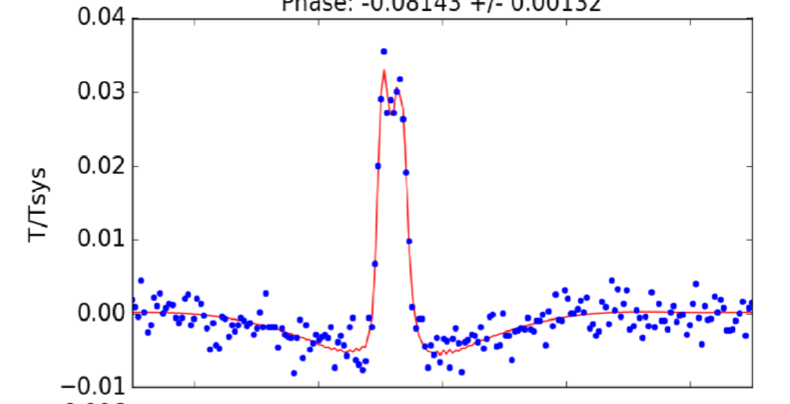

...and how they decompose in so-called *eigenpulses* (principal components). In this case, they are learned from a library of 16,707 pulsar observations:

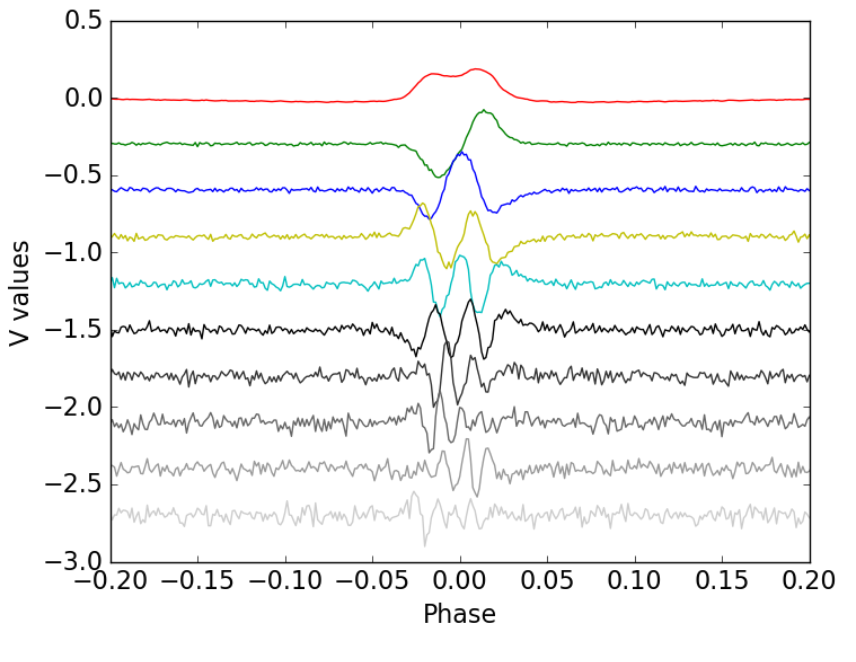

##### 2.1.4.3. Human Faces

`sklearn` also contains datasets with human face collections taken in uniform format. 10 pictures of 40 different (famous) people are included in this library. Each of the 400 images is 64x64 pixels (i.e. the dimensionality is 4096).

Let's download the data (this will take ~250Mb locally):

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(data_home='.', min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

As can be seen from the output above, we downloaded 1348 images of 62x47 px. The dataset therefore has a dimensionality K = 62x47 = 2914.

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Warning:** All data are by default downloaded in the same directory as where this notebook is located. Feel free to delete them afterwards.
</div>

Let's calculate the 150 first principal components.

In [ ]:
P = 150

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(P)
pca.fit(faces.data)  # note that faces.data already flattened the 2D images into vectors

In [ ]:
faces.data.shape

Let's check the principal components:

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Spooky!

Let's see how the explained variance ratio evolves with the number of principal components:

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print("The cumulative explained variance for {} number of PCs is {}".format(P, np.cumsum(pca.explained_variance_ratio_)[-1]))

This is not too bad. This suggests that over 90% of the variance in the data are accounted for with 150 PCs, hence that these are able to reproduce most of the essential characteristics in the images. Let's check that out by trying to reproduce the original images with the PCs:

In [ ]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)

Let's use directly the appropriate methods from the PCA class to get the coefficients of the projection of the faces onto the PCs (eigenfaces), and the projected images obtained from the linear combination of eigenfaces with these coefficients (if you remember what we saw in Sec. 2.1.2., these are both obtained through dot products):

In [ ]:
coeffs = pca.transform(faces.data)
projected = pca.inverse_transform(coeffs)

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

Not too bad!

But let's now rather see a *direct* application of the above to astronomy...

##### 2.1.4.4. Direct imaging of exoplanets

[**VIP**](https://vip.readthedocs.io/en/latest/index.html) is the largest open-source package for high-contrast imaging of exoplanets. One of its key modules contains a number of algorithms for modeling and subtraction of stellar PSFs, which is a necessary step to be able to make images of exoplanets hidden in the bright glare of their star.

One of the most popular algorithms is based on PCA, and leverages the Angular Differential Imaging (ADI) strategy. ADI lets the field of view rotate during the observation while preserving the PSF as static as possible. Any planet hidden in the stellar glare therefore rotates and falls on different pixels over time. This is illustrated below, where the red dot represents a hidden planet:

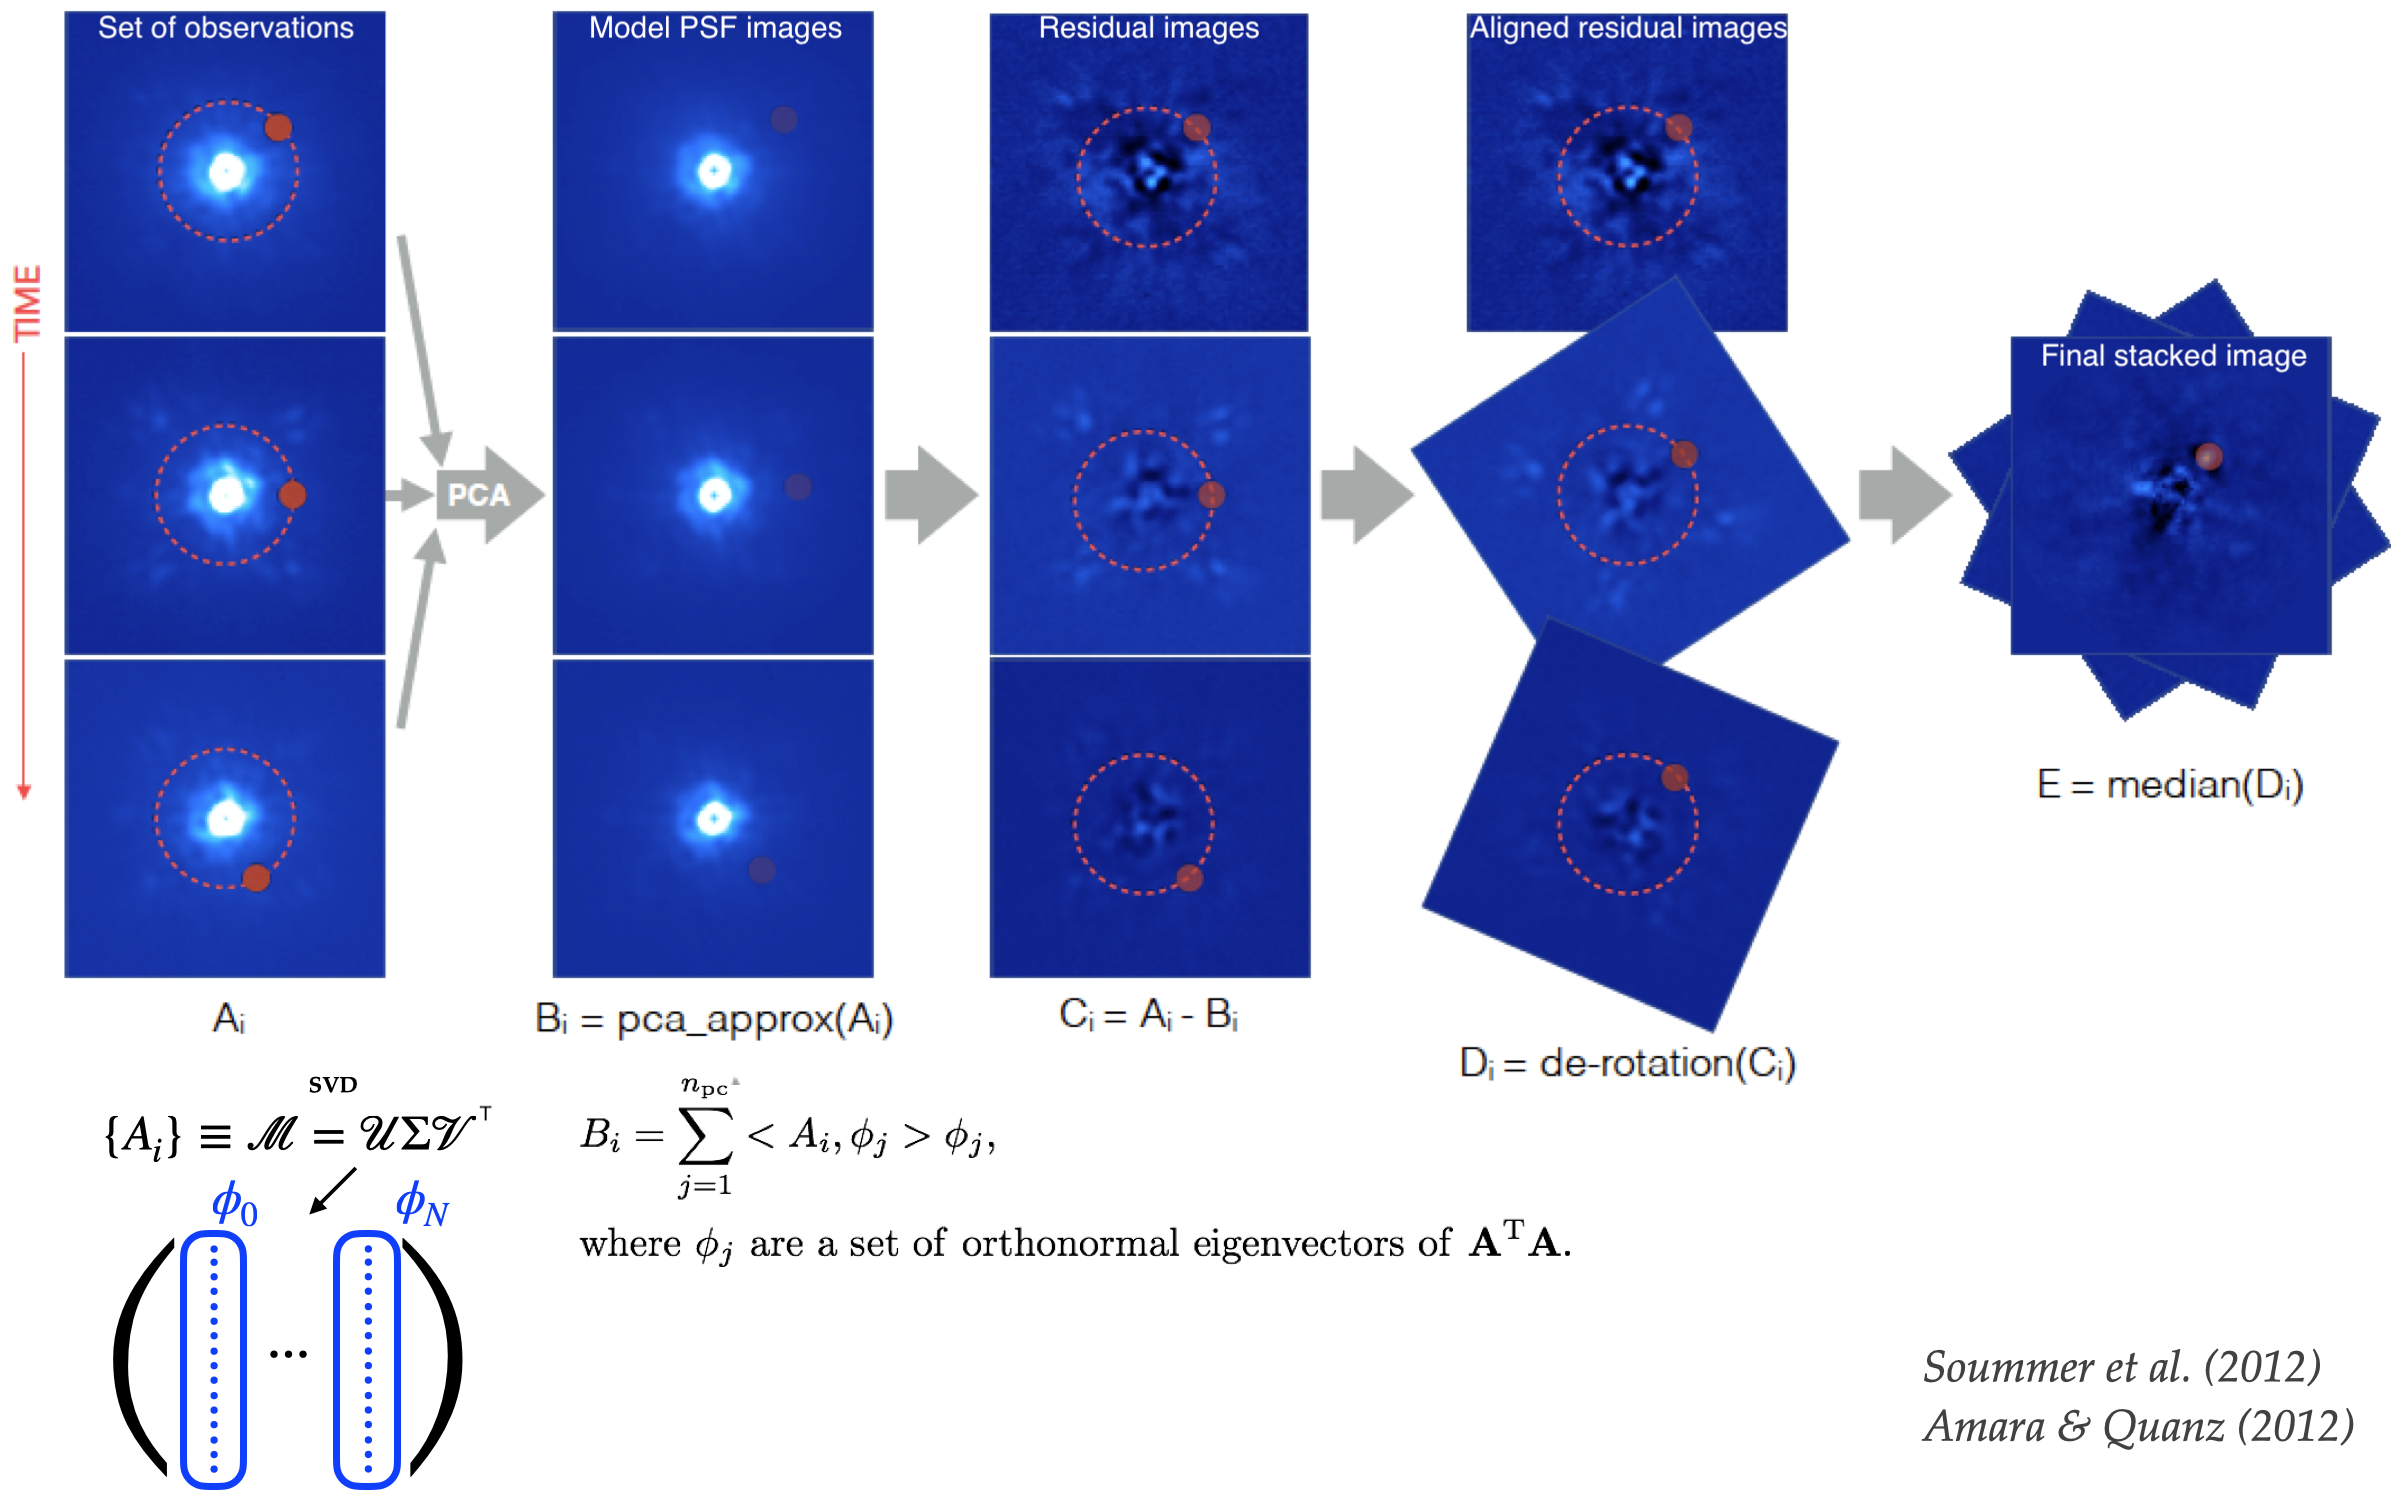

The set of observed images is flattened into a 2D matrix, and eigenvectors (*eigenimages* in this case, as the vectors are flattened images) are inferred from the SVD of the matrix. Model images are then found by projecting the eigenimages onto the original images.

More details in [Amara & Quanz (2012)](https://ui.adsabs.harvard.edu/abs/2012MNRAS.427..948A/abstract) and [Soummer et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...755L..28S/abstract) who first proposed this approach for direct imaging.

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Side math note:** In the schematics above, the eigenvectors are directly inferred from the columns of $U$ in the SVD $M=U\Sigma V^T$, instead of calculated first from the covariance matrix. This is a math trick to make computation much faster. Astronomical datasets of 100s (or 1000s) of images that are 100s x 100s px would result in enormous covariance matrices - very computationally expensive to calculate. We leverage the fact that the eigenvectors of $M$ are, within a multiplicative factor, identical to those of the covariance matrix (magic again!). *Demo*:

$$ MM^T = U\Sigma^T V^T V\Sigma U^T = U\Sigma^T \Sigma U^T = U (\Sigma^T \Sigma) U^T$$

where the second equality stems from the property that $U$ and $V$ are unitary matrices.
</div>

Let's load an ADI dataset on the famous [$\beta$ Pic](https://en.wikipedia.org/wiki/Beta_Pictoris) system to illustrate this. The data were obtained with VLT instrument NaCo. Details about the data are available in [Absil et al. (2013)](https://ui.adsabs.harvard.edu/abs/2013A%26A...559L..12A/abstract).

We use the fits loader utility implemented in VIP:

In [ ]:
from vip_hci.fits import open_fits

cube = open_fits("direct_imaging_data/naco_betapic_cube.fits")
pa   = open_fits("direct_imaging_data/naco_betapic_pa.fits") 

The data are composed of a set of 61 images (101 x 101 px), and its associated angles indicating their orientation (these are called parallactic angles):

In [ ]:
pa

Let's visualize the images of the cube with `hciplot`, a package for plotting and visualization of high-contrast data (it is installed together with VIP):

In [ ]:
%matplotlib inline
import hciplot

hciplot.plot_cubes(cube, backend='bokeh')  # if this fails on your machine, remove the ", backend='bokeh'" part.

Use the slider to check out the images of the cube.
The images are dominated by residual stellar light - you can't see any planet yet.
Although there is a bit of variation, you'll notice that the images are overall very similar to each other.
Let's leverage this fact with PCA to create an appropriate PSF model for subtraction.

This is as simple as this:

In [ ]:
from vip_hci.psfsub import pca

final_pca_image = pca(cube, pa, ncomp=5)

Let's use `hciplot` again to visualize the result:

In [ ]:
%matplotlib inline
hciplot.plot_frames(final_pca_image)

**Congrats**! You've made the image of an exoplanet! The bright blob you see to the bottom right is the exoplanet $\beta$ Pic b.

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 11:** Try building and subtracting a PSF model made from a larger number of PCs. Then compare with the result obtained with 5 pcs. What do you observe?

</div>

Compare the previous image with the new one (the first argument of `plot_frames` can take a tuple of 2 images):

Using a larger number of PCs reduces the residual noise, but also decreases the signal of the exoplanet. This is due to the planet being increasingly captured in the PCs. This partial self-subtraction is always present to some extent, which accounts for the negative side lobes.

The optimal number of PCs to use is a trade-off between making a good stellar PSF model which leads to low residual noise after subtraction (better with a higher number of PCs) and limiting the amount of self-subtraction (lower number of PCs).

Now, let's check the PCs. These are one of the outputs of the `pca` function when it is called with the `full_output=True` option.

In [ ]:
final_pca_image2, pcs, _, _, _ = pca(cube, pa, ncomp=10, full_output=True)

In [ ]:
hciplot.plot_cubes(pcs, backend='bokeh')

One can see that they capture different recurrent features in the stellar PSF.

### 2.1.5. Summary

**Summarizing the main points of PCA:**

* [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is a **fast and linear dimensionality reduction algorithm**.
* It is one of the most used **unsupervised** machine learning algorithm (i.e., it doesn't need labeled training data).
* Principal components have both **direction** and **magnitude**, representing the axes with the most variance and the amount of variance they capture, respectively.
* PCA basically applies a **transform** to the data such that the new basis in which the data are contained are aligned with the axes of maximum variance.
* Using projections on the **truncated PCA basis**, one can build models, interpolate missing data, or search for different populations of objects (clusters).

Historically, PCA was invented in 1901 by Karl Pearson. The mathematical transform at the core of PCA (singular value decomposition) was invented in 1873, by E. Beltrami.

This is a technique referred to with *many* names, depending on the field, purpose or variant used (but same maths behind!):
- Karhunen–Loève transform (KLT) in signal processing,
- the Hotelling transform in multivariate quality control,
- proper orthogonal decomposition (POD) in mechanical engineering,
- singular value decomposition (SVD) of X,
- eigenvalue decomposition (EVD) of XTX in linear algebra,
- factor analysis (see below),
- Eckart–Young theorem (Harman, 1960),
- empirical orthogonal functions (EOF) in meteorological science (Lorenz, 1956),
- empirical eigenfunction decomposition (Sirovich, 1987),
- quasiharmonic modes (Brooks et al., 1988),
- spectral decomposition,
- empirical modal analysis, in structural dynamics.

Below are provided some specific **variants of PCA**:

*These are provided for the sake of completeness, however this material corresponds to a more advanced level than required for successful completion of this course. It is left here FYI as it may be useful to you some day.*

**A) Incremental PCA**

PCA can be impractical for large data sets which exceed the memory per core as the computational requirement goes as $\mathscr{O}(D^3$) and the memory requirement goes as $\mathscr{O}(2D^2)$, with $D$ the dimensionality. When all data do not fit in memory, the solution can be to calculate the principal components incrementally, i.e. on smaller chunks of the data, and updating the principal components after incorporation of more chunks.

Let's consider the iris dataset as an example to show the results obtained with PCA and Incremental PCA -- note that this is just for comparison purpose as here the dataset is not big enough to really motivate incremental PCA:

In [ ]:
# let's load the iris data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Let's first calculate the first 2 PCs using regular PCA, and their projection coefficients onto the data:

In [ ]:
n_components=2

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)  # fit_transform() finds both the components (fit), and the projection coefficients (transform), yielding the latter in a single function call 

Let's now calculate the first 2 PCs (and their projection coefficients) using IPCA, considering a batch size of 10 (the total dataset has $N = 150$ measurements).

In [ ]:
batch_size=10

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA

ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
X_ipca = ipca.fit_transform(X)

Finally, let's plot the results:

In [ ]:
colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error with respect to PCA: %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

**B) Sparse PCA**

A particular disadvantage of PCA is that the principal components are usually linear combinations of all input variables. Sparse PCA overcomes this disadvantage by loading less input variables.

Main idea of PCA is to add sparsity constraint on the input variables, and achieve optimal tradeoff between variance explained (dimension reduction) and sparse loadings (interpretability).

Different variants of sparse PCA exist based on the criterion used for sparse selection of the input variables in a large space.

More details in this recent [review paper](https://ieeexplore.ieee.org/document/8412518).

**C) Robust PCA**

PCA can be very sensitive to outliers - which explode in the covariance matrix. For data plagued with a lot of outliers, a more robust PCA is the [L1-PCA](https://en.wikipedia.org/wiki/L1-norm_principal_component_analysis), where the eigenvectors are found by minimizing the L1-norm instead of the L2-norm (the latter happens when the PCs are taken as the eigenvectors of the covariance matrix).

### 2.2. Non-negative Matrix Factorization (NMF)

<a class="anchor" id="three"></a>

#### 2.2.1. Principle

One of the biggest drawbacks of PCA is that the eigenvectors are defined relative to the mean data vector, resulting in **principal components that can be positive or negative**. But for many physical systems we know *a priori* that the data can be represented as a linear sum of **positive components** (or at least non-negative), e.g., spectra or PSFs. 

**[Non-negative Matrix Factorization (NMF)](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)** treats the data as a linear sum of positive-definite components. 

NMF assumes that any data matrix $X$ with all positive elements can be factored into two matrices, $W$ and $H$, with

$$ X = W H, $$

where both $W$ and $H$ are non-negative. 

So, $WH$ is an approximation of $X$: with the elements of $X$ represented as the combination of the rows of $W$ with the columns of $H$:

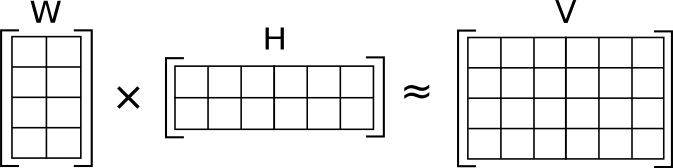

The non-negative bases can be derived through an iterative process, by minimizing the reconstruction error $|| (X - W H)^2 ||$.

Given the typical need for an initial guess for $W$ or $H$, the initialization of the iterative process can be done with PCA.
While the above may converge the fastest to a solution, the iterative process does not guarantee not falling into local minima, such that random initialization and cross-validation can be used to find the global minimum (albeit more computationally expensive).

Examples in the astronomy literature include [Allen et al. 2008](http://arxiv.org/abs/0810.4231) or [Ren et al. 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...852..104R/abstract).

In Scikit-Learn the [NMF implementation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) can be called in a very similar way as PCA (below is an academic example with random data):

In [ ]:
# Execute this cell
from sklearn.decomposition import NMF

X = np.random.random((100,10)) # 100 points in 10-D, all +ve
nmf = NMF(n_components=3, max_iter=500)
nmf.fit(X)

W = nmf.transform(X) # project to 3 dimension
H = nmf.components_ # 3x10 array of components
err = nmf.reconstruction_err_ # how well 3 components capture the data

#print(W)
#print(H)
#print(err)

Since NMF finds its components through an iterative process, you can set the maximum number of iterations through `max_iter`. You may get non-convergence warnings if not set high enough.

#### 2.2.2. Application to SDSS spectra

An example (and comparison to PCA) is given below.

In [ ]:
# Execute the next 2 cells
# Example from Figure 7.4
# Author: Jake VanderPlas
# License: BSD
#from sklearn.decomposition import RandomizedPCA

from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

In [ ]:
#----------------------------------------------------------------------
# Compute PCA, and NMF components
def compute_PCA_NMF(n_components=5):
    spec_mean = spectra.mean(0)

    # PCA: use randomized PCA for speed 
    #pca = RandomizedPCA(n_components - 1)
    pca = PCA(n_components - 1,svd_solver='randomized')
    pca.fit(spectra)
    pca_comp = np.vstack([spec_mean, pca.components_])

    # NMF requires all elements of the input to be greater than zero
    spectra[spectra < 0] = 0
    nmf = NMF(n_components)
    nmf.fit(spectra)
    nmf_comp = nmf.components_

    return pca_comp, nmf_comp

n_components = 5
decompositions = compute_PCA_NMF(n_components)

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = ['PCA components', 'NMF components']

for i, comp in enumerate(decompositions):
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.set_xlabel('wavelength (Angstroms)')

        ax.plot(wavelengths, comp[j], '-k', lw=1)

        # plot zero line
        xlim = [3000, 7999]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
        ax.set_xlim(xlim)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines(): 
            l.set_markersize(2) 

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])
        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

plt.show()

See how all the NMF bases/components are positive? This can be very useful for some specific physical applications.

#### 2.2.3. Application to direct imaging of exoplanets

Since modulo some noise all pixel intensities of interest should be positive, it is a valid approach for PSF modeling and subtraction.
VIP also has an implementation of NMF, in the same module as for PCA.
Let's illustrate its capabilities on the same $\beta$ Pic dataset as above.

In [ ]:
from vip_hci.fits import open_fits

cube = open_fits("direct_imaging_data/naco_betapic_cube.fits")
pa   = open_fits("direct_imaging_data/naco_betapic_pa.fits") 

In [ ]:
from vip_hci.psfsub import nmf

final_nmf_image = nmf(cube, pa, ncomp=5, init_svd='nndsvda')

Where `init_svd` can be set to different values depending on how the initialization of the iterative process should be done (it can also take 'random').

In [ ]:
final_nmf_image2 = nmf(cube, pa, ncomp=5, init_svd='random')

Let's visualize the results and compare to PCA:

In [ ]:
hciplot.plot_frames((final_nmf_image, final_nmf_image2, final_pca_image))

The results of NMF can be a bit dependent on the initialization, but the image quality can end up very similar or in some cases slightly better than PCA for a given number of components (Ren et al. 2018).

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Side note**:  The components of NMF are non-negative, such that the model PSF images are non-negative. However this does not prevent the residual images (data-model) to contain negative values, as above.
</div>

### 2.3. Independent Component Analysis (ICA)

#### 2.3.1. Principle

<a class="anchor" id="four"></a>

[Independent component analysis](https://en.wikipedia.org/wiki/Independent_component_analysis) separates a multivariate signal into **additive subcomponents that are maximally independent**.

The success of ICA separation of mixed signals depend on the validity of two assumptions:

- The source signals are **independent** of each other.
- The values in each source signal have **non-Gaussian** distributions.

Mixing source signals has three effects of :

- **Dependence**: As per assumption 1, the source signals are independent; however, their signal mixtures are not. This is because the signal mixtures share the same source signals.
- **Normality**: According to the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), the distribution of a sum of independent random variables with finite variance tends towards a Gaussian distribution. Loosely speaking, a sum of two independent random variables usually has a distribution that is closer to Gaussian than any of the two original variables. Here we consider the value of each signal as the random variable.
- **Complexity**: The temporal complexity of any signal mixture is greater than that of its simplest constituent source signal.

For data where the **components are statistically independent** (or nearly so) ICA has become a popular method for separating mixed components.  

#### 2.3.2. Application to source separation

***The classical example is the so-called "cocktail party" problem.*** This is illustrated in the following figure from *Hastie, Tibshirani, & Friedman*. Think of the "source signals" as two voices at a party. You are trying to concentrate on just one voice.  What you hear is something like the "measured signals" pattern. You could run the data through PCA and that would do an excellent job of reconstructing the signal with reduced dimensionality, but it wouldn't actually isolate the different physical components (bottom-left panel). ICA on the other hand can (bottom-right panel).

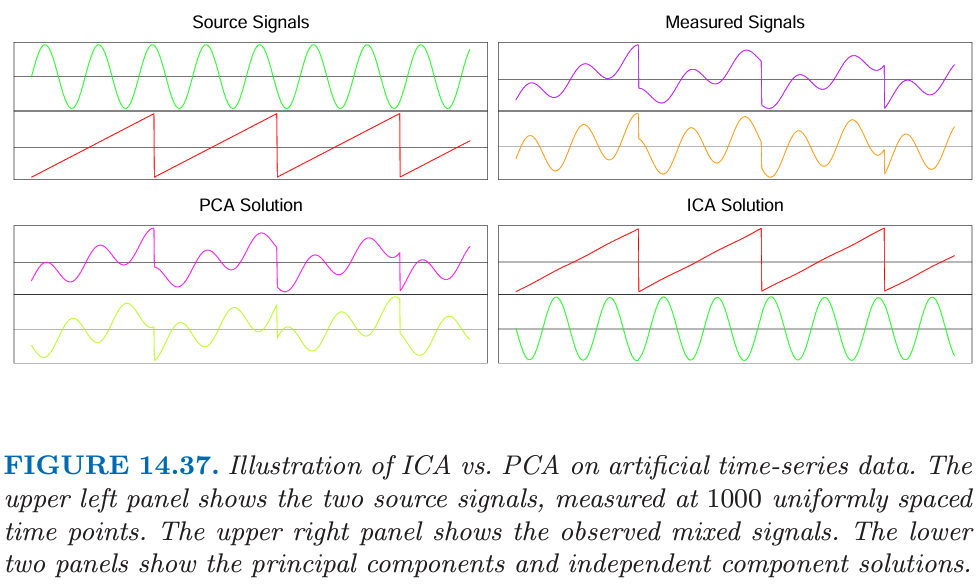

You can find this image (as well as the entire textbook for free!) [here](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12_toc.pdf).

Hastie et al.: 
> *ICA applied to multivariate data looks for a sequence of orthogonal projections such that the projected data look as far from Gaussian as possible. With pre-whitened data, this amounts to looking for
components that are as independent as possible.*

In short you want to ***find components that are maximally non-Gaussian***, since the sum of two or more random variables will be more Gaussian than either of the components individually (remember the **Central Limit Theorem**).

Let's illustrate the performance of ICA by disentangling a mixture of non-Gaussian signals, using `sklearn`'s [fast-ICA implementation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html). 

Let's first generate 3 signals, e.g. sinuisoidal, square and saw-tooth, and produce 3 observations of the mixed signals (with slightly different mixing coefficients). A bit of noise is added to crank up the challenge.

In [ ]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

Let's now fit both ICA and PCA models. We consider 3 components in both cases.

In [ ]:
from sklearn.decomposition import PCA, FastICA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

Finally let's plot the result of the decomposition in each case:

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

Note that the colors are mixed, but the recoverd ICA signals are basically identical to the true sources. On the contrary, PCA couldn't disentangle properly the different signals.

ICA can thus in some cases be a much more powerful technique than PCA, capable of finding the underlying factors or sources where PCA fails completely.

#### 2.3.3. Application to SDSS spectra

ICA is a good choice for a complex system with relatively independent components. For example a galaxy is roughly a linear combination of cool stars and hot stars, and a quasar is just a galaxy with additional components from an accretion disk and emission line regions. **Ideally we want "eigenvectors" that are aligned with those physical traits/regions as opposed to abstract mathematical constructs.**

In [ ]:
from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

In [ ]:
# Compute ICA
np.random.seed(500)
nrows = 500
n_components = 5
ind = np.random.randint(spectra.shape[0], size=nrows)

spec_mean = spectra[ind].mean(0)

ica = FastICA(n_components - 1)
ica.fit(spectra[ind])
ica_comp = np.vstack([spec_mean,ica.components_]) # Add the mean to the components

In [ ]:
# Make plots
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

title = 'Sample spectra'
title_ICA = 'ICA components'

for j in range(n_components):
    
    # plot the components
    ax = fig.add_subplot(n_components, 2, 2*j+2)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength ${\rm (\AA)}$')
    ax.plot(wavelengths, ica_comp[j], '-k', lw=1)

    # plot zero line
    xlim = [3000, 7999]
    ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax.set_xlim(xlim)

    if j == 0:
        ax.set_title(title_ICA, fontsize='medium')
        
    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

    # plot the first j spectra
    ax2 = fig.add_subplot(n_components, 2, 2*j+1)
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax2.set_xlabel(r'wavelength ${\rm (\AA)}$')
    ax2.plot(wavelengths, spectra[j], '-k', lw=1)
    
    # plot zero line
    ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax2.set_xlim(xlim)

    if j == 0:
        ax2.set_title(title, fontsize='medium')

    if j == 0:
        label = 'mean'
    else:
        label = 'component %i' % j

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)


    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            ha='left', va='top', bbox=dict(ec='w', fc='w'),
            fontsize='small')

plt.show()

ICA actually looks like it is picking up distinct line regions as the components.

As with PCA and NMF, we can similarly do a reconstruction:

In [ ]:
# Find the coefficients of a particular spectrum
spec = spectra[1]
evecs = data['evecs']
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0)

for i, n in enumerate([0, 2, 4, 8]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        #text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        #text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
        
    ax.text(0.01, 0.95, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

Ivezic, Figure 7.7 compares the components found by the PCA, ICA, and NMF algorithms.  Their differences and similarities are quite interesting.

![Ivezic, Figure 7.4](http://www.astroml.org/_images/fig_spec_decompositions_1.png)

### 2.4. Sparse dictionary learning

#### 2.4.1. Principle

Sparse dictionary learning aims at finding a sparse representation of the input data through a linear combination of basic elements called **atoms**. The atoms form a **dictionary**. Contrary to principal components, the set of atoms do not need to be orthogonal - hence may be an over-complete set larger than the data (i.e. in inappropriate cases, it may not be a *dimensionality reduction* algorithm).

This approach is most used in compressed sensing and signal recovery. Prior to dictionary learning, it was common to use predefined dictionaries (such as Fourier or wavelet transforms) - but a dictionary learned from the data can improve **sparsity** (i.e. the need for less components, hence better compression).

Mathematically, the algorithm solves the optimization problem:

$$(U^*,V^*) = \text{argmin}_{U,V} 0.5 || X - U V ||^2 + \alpha * || U ||_{1,1}$$

where $||.||_{1,1}$ stands for entry-wise matrix norm, and $\alpha$ is a parameter controlling sparsity.

#### 2.4.2. Application for image denoising

Let's first create a noisy raccoon image based on a `scipy` dataset - we distort the right half of it.

In [ ]:
try:  # Scipy >= 1.10
    from scipy.datasets import face
except ImportError:
    from scipy.misc import face

raccoon_face = face(gray=True)

# Convert from uint8 representation with values between 0 and 255 to
# a floating point representation with values between 0 and 1.
raccoon_face = raccoon_face / 255.0

# downsample for higher speed
raccoon_face = (
    raccoon_face[::4, ::4]
    + raccoon_face[1::4, ::4]
    + raccoon_face[::4, 1::4]
    + raccoon_face[1::4, 1::4]
)
raccoon_face /= 4.0
height, width = raccoon_face.shape

# Distort the right half of the image
print("Distorting image...")
distorted = raccoon_face.copy()
distorted[:, width // 2 :] += 0.075 * np.random.randn(height, width // 2)

For the rest of this section, it will be useful to define a routine that plots the difference between 2 images:

In [ ]:
def show_with_diff(image, reference, title):
    """Helper function to display denoising"""
    plt.figure(figsize=(7.5, 3.3))
    plt.subplot(1, 3, 1)
    plt.title("Reference")
    plt.imshow(reference, vmin=0, vmax=1, cmap=plt.cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
    plt.subplot(1, 3, 2)
    plt.title("Image")
    plt.imshow(image, vmin=0, vmax=1, cmap=plt.cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
    plt.subplot(1, 3, 3)
    difference = image - reference

    plt.title("Difference (norm: %.2f)" % np.sqrt(np.sum(difference**2)))
    plt.imshow(
        difference, vmin=-0.5, vmax=0.5, cmap=plt.cm.PuOr, interpolation="nearest"
    )
    plt.xticks(())
    plt.yticks(())
    plt.suptitle(title, size=16)
    plt.subplots_adjust(0.02, 0.02, 0.98, 0.79, 0.02, 0.2)
    plt.show()

Now let's compare the image we distorted to the original image:

In [ ]:
show_with_diff(distorted, raccoon_face, "Distorted image")

Now let's attempt to extract sparse features using the relevant function of `sklearn`. 

The first step is to extract reference patches. For this we provide a reference image (here the good half of the original image) and set a patch size:

In [ ]:
from time import time # we'll time how long it takes
from sklearn.feature_extraction.image import extract_patches_2d

# Extract all reference patches from the left half of the image
print("Extracting reference patches...")
t0 = time()
patch_size = (7, 7)
data = extract_patches_2d(distorted[:, : width // 2], patch_size)
data = data.reshape(data.shape[0], -1)
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)
print(f"{data.shape[0]} patches extracted in %.2fs." % (time() - t0))

Next we use the `sklearn`'s `MiniBatchDictionaryLearning` algorithm to try to learn **atoms** on the reference patches. Input parameters are the number of components and batch size, alpha parameter, and maximum number of iterations. 

In [ ]:
from sklearn.decomposition import MiniBatchDictionaryLearning

print("Learning the dictionary...")
t0 = time()
dico = MiniBatchDictionaryLearning(
    n_components=800,
    batch_size=200,
    alpha=1.0,
    max_iter=10,
)

V = dico.fit(data).components_  # here we create the dictionary of atoms by fitting the data, and assign the atoms to V 
dt = time() - t0
print(f"{dico.n_iter_} iterations / {dico.n_steps_} steps in {dt:.2f}.")

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(V[:100]):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle(
    "Dictionary learned from face patches\n"
    + "Train time %.1fs on %d patches" % (dt, len(data)),
    fontsize=16,
)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

Then we extract the noisy patches, and reconstruct them thanks to the dictionary.

In [ ]:
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

print("Extracting noisy patches... ")
t0 = time()
noisy_data = extract_patches_2d(distorted[:, width // 2 :], patch_size)
noisy_data = noisy_data.reshape(data.shape[0], -1)
intercept = np.mean(noisy_data, axis=0)
noisy_data -= intercept
print("done in %.2fs." % (time() - t0))

transform_algorithms = [
    ("Orthogonal Matching Pursuit\n1 atom", "omp", {"transform_n_nonzero_coefs": 1}),
    ("Orthogonal Matching Pursuit\n2 atoms", "omp", {"transform_n_nonzero_coefs": 2}),
    ("Least-angle regression\n4 atoms", "lars", {"transform_n_nonzero_coefs": 4}),
    ("Thresholding\n alpha=0.1", "threshold", {"transform_alpha": 0.1}),
]

reconstructions = {}
for title, transform_algorithm, kwargs in transform_algorithms:
    print(title + "...")
    reconstructions[title] = raccoon_face.copy()
    t0 = time()
    
    dico.set_params(transform_algorithm=transform_algorithm, **kwargs) # here's where different algorithms are assigned for the transformation
    
    code = dico.transform(noisy_data) # the noisy part of the image is transformed into patches
    patches = np.dot(code, V) # V = atoms learned from good part of image => here we project the atoms onto the corrupted patches
    patches += intercept  # we add back the mean
    patches = patches.reshape(len(noisy_data), *patch_size)
    
    if transform_algorithm == "threshold":
        patches -= patches.min()
        patches /= patches.max()
    reconstructions[title][:, width // 2 :] = reconstruct_from_patches_2d(
        patches, (height, width // 2)
    )
    dt = time() - t0
    print("done in %.2fs." % dt)
    show_with_diff(reconstructions[title], raccoon_face, title + " (time: %.1fs)" % dt)

This example illustrates how dictionary learning can help to correct a corrupted image.

Among the different options tested above, the 2 atoms case calculated with the so-called Orthogonal Matching Pursuit method leads to the best reconstruction of the corrupted half of the image.

### 2.5. Comparison of all linear methods

Let's use another library of faces to illustrate the differences (and similarities) between the methods seen so far. Although in some cases, some may hold an advantage over the other, in other cases like this one, all methods lead to similar results:

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise 12:** Apply all methods above: PCA, NMF, ICA and dictionary learning on the Olivetti faces dataset. 

a) Compare the first 6 components/atoms inferred by each method. 

b) Compare the reconstructions for the first 6 faces of the library, using 50 components/atoms.

</div>

Let's load the data:

In [ ]:
import logging
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces

rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
#faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
#faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

And let's define a plotting function for the projected images.

In [ ]:
n_row, n_col = 2, 3
n_im = n_row*n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

Let's test the plotting function:

In [ ]:
plot_gallery("Faces from dataset", faces[:n_im])

Now, attempt the different decompositions and reconstructions below:

In [ ]:
n_components = 50

In [ ]:
# Try PCA here
pca_estimator = decomposition.PCA(
    n_components=n_components, whiten=True
)
pca_estimator.fit(faces)
# plot the first eigenfaces first
plot_gallery(
    "Eigenfaces - PCA", pca_estimator.components_[:n_components]
)
# then the reconstructed images
coeffs = pca_estimator.transform(faces[:n_im])
proj = pca_estimator.inverse_transform(coeffs)
plot_gallery(
    "Reconstructed faces with PCA", proj
)

In [ ]:
# Try NMF here
nmf_estimator = decomposition.NMF(n_components=n_components, tol=5e-3, max_iter=2000)
nmf_estimator.fit(faces)  # original non- negative dataset
plot_gallery("Non-negative components - NMF", nmf_estimator.components_[:n_components])
# then the reconstructed images
coeffs = nmf_estimator.transform(faces[:n_im])
proj = nmf_estimator.inverse_transform(coeffs)
plot_gallery(
    "Reconstructed faces with NMF", proj
)

In [ ]:
# Try ICA here
ica_estimator = decomposition.FastICA(
    n_components=n_components, max_iter=400, whiten="arbitrary-variance", tol=15e-5
)
ica_estimator.fit(faces)
plot_gallery(
    "Independent components - FastICA", ica_estimator.components_[:n_components]
)
# then the reconstructed images
coeffs = ica_estimator.transform(faces[:n_im])
proj = ica_estimator.inverse_transform(coeffs)
plot_gallery(
    "Reconstructed faces with ICA", proj
)

In [ ]:
# Try Dictionary learning here
batch_dict_estimator = decomposition.MiniBatchDictionaryLearning(
    n_components=n_components, alpha=0.1, max_iter=50, batch_size=3, random_state=rng
)
batch_dict_estimator.fit(faces)
plot_gallery(
    "Dictionary learning atoms", batch_dict_estimator.components_[:n_components]
)
# then the reconstructed images
coeffs = batch_dict_estimator.transform(faces[:n_im])
#code = dico.transform(data)
proj = np.dot(coeffs, batch_dict_estimator.components_[:n_components])
#proj = batch_dict_estimator.inverse_transform(components)
plot_gallery(
    "Reconstructed faces with dictionary learning", proj
)

***Summary of the differences***

- PCA: orthogonal components. Specifically: maximizes the variance of the input signal.
- NMF: non-negative components, which can be forced to be orthogonal (but not necessarily).
- ICA: Maximally independent and maximally non-Gaussian (but not necessarily orthogonal) components. Assumes non-Gaussian signals.
- Dictionary learning: non-independent non-orthogonal additive components (*atoms*)

**All methods seen above rely on linear decompositions**, whereas the variations in the data may not be. So it may not always be appropriate to use them. In some cases, it may be more appropriate to use a non-linear dimensionality reduction algorithm.

## 3. Non-Linear dimensionality reduction


*This section is provided for the sake of completeness, however the material presented here corresponds to a more advanced level than required for successful completion of this course. It is left here for your information - it may also be useful to you some day.*

### 3.1. Non-linear PCA

<a class="anchor" id="two"></a>

PCA is a linear dimensional reduction, which means it won't work well in some cases.

A fraction of non-linear dimensionality approaches can be viewed as generalizations of PCA, through:

- [**Principal Curves**](https://en.wikipedia.org/wiki/Principal_curvature) or [**Principal Geodesics**](https://en.wikipedia.org/wiki/Principal_geodesic_analysis), or
- an arbitrary non-linear mapping of the data (called **kernel**) into a new space before PCA can be applied in the new space - this is called **Kernel PCA**.

Let's consider an example of the latter for better visualization. We create a dataset consisting of data points spread on two concentric circles.

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

The data are divided into testing and training sets. Now let's try a decomposition with both PCA and kernel PCA, using 2 components for PCA. For kernel PCA we consider a Gaussian radius basis function (rbf) for the kernel.

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

Let's see how the data projected onto the principal components

In [ ]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

First, the PCA applies a linear transform - it will center, rescale the data according to the respective variance, and rotate. In this case, projection of the data onto the PCs only led to a small rotation. No major change. This will not help us find a linear classifier to distinguish the 2 populations.

Kernel PCA on the other hand applies a non-linear projection. In this case the Gaussian kernel, makes a very useful split of the data, such that a linear classifier can be used to identify the populations.

Let's highlight a weakness of kernel PCA though, which can be noticed upon projection back to the original space (i.e. reconstruction).

In [ ]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

Let's plot the reconstructed points:

In [ ]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

Since PCA is a linear mapping we reconstruct perfectly the original data. This is not the case for kernel PCA, for which an analytical back-projection cannot be done. Instead a regression is trained internally, and applied, which comes with some approximations.

In that sense, kernel PCA may not be straightforward to create low-rank models (as we did in direct imaging) or interpolate missing data (as we did with spectra).

### 3.2. Techniques based on manifold learning

Manifold learning ~ learning the curved space in which the data points reside. The idea for algorithms in this class is that the dimensionality of many data sets is only *artificially* high, and can be reduced.

Let's visualize the different methods in this category using a dataset where the data points are distributed along a flat S-shape residing in a 3D space:

In [ ]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker

from sklearn import datasets, manifold

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

Let's define a few plotting functions and look at the data:

In [ ]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")

#### 3.2.1 Locally linear embedding

<a class="anchor" id="two"></a>

It first finds the nearest neighbours in the data, then aims to find lower-dimensional projections of the data (**embeddings**) which preserves distances within local neighborhoods.

LLE is akin to a series of local Principal Component Analyses which are globally compared to then find the best non-linear embedding.

For **LLE** we need to define two key parameters:

In [ ]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

Different methods can be used to find the embeddings:

In [ ]:
params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)

lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
S_hessian = lle_hessian.fit_transform(S_points)

lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
S_mod = lle_mod.fit_transform(S_points)

Different methods can lead to different or similar projections:

In [ ]:
fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", S_standard),
    ("Local tangent space alignment", S_ltsa),
    ("Hessian eigenmap", S_hessian),
    ("Modified locally linear embedding", S_mod),
]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points, S_color, name)

plt.show()

Here 3/4 methods efficiently *unrolled* the S-curve.

#### 3.2.2 IsoMap

The IsoMap algorithm provides a method for estimating the intrinsic geometry of the data, based on neighbouring data points.
Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points.

Let's try it on the S-curve:

In [ ]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(S_points)

plot_2d(S_isomap, S_color, "Isomap Embedding")

One can notice that a diagonal-shape hole in the data is preserved than with some LLE methods.

#### 3.2.3. t-distributed Stochastic Neighbor Embedding

[t-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (t-SNE): proceeds by mapping the data to two- or three-dimensional points in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.


Let's also try it on the S-curve:

In [ ]:
t_sne = manifold.TSNE(
    n_components=n_components,
    perplexity=30,
    init="random",
    max_iter=250,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")

## References

- **Chapter 7** of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 
- Astro-statistics lecture by Davide Gerosa: https://github.com/dgerosa/astrostatistics_bicocca_2022  (in particular lectures 15 and 16)
- Scikit-learn documentation on [dimensionality reduction](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas
- [Introduction to astroML: Machine learning for astrophysics](http://ieeexplore.ieee.org/xpl/articleDetails.jsp?tp=&arnumber=6382200), Vanderplas et al, proc. of CIDU, pp. 47-54, 2012.
- [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12_toc.pdf), Hastie, Tibshirani & Friedman, 2017.
- Statistics, Data Mining, and Machine Learning for Astronomy, Ivezic et al, 2014.
